📱 Challenge: Analyze Social Media Engagement Over Time

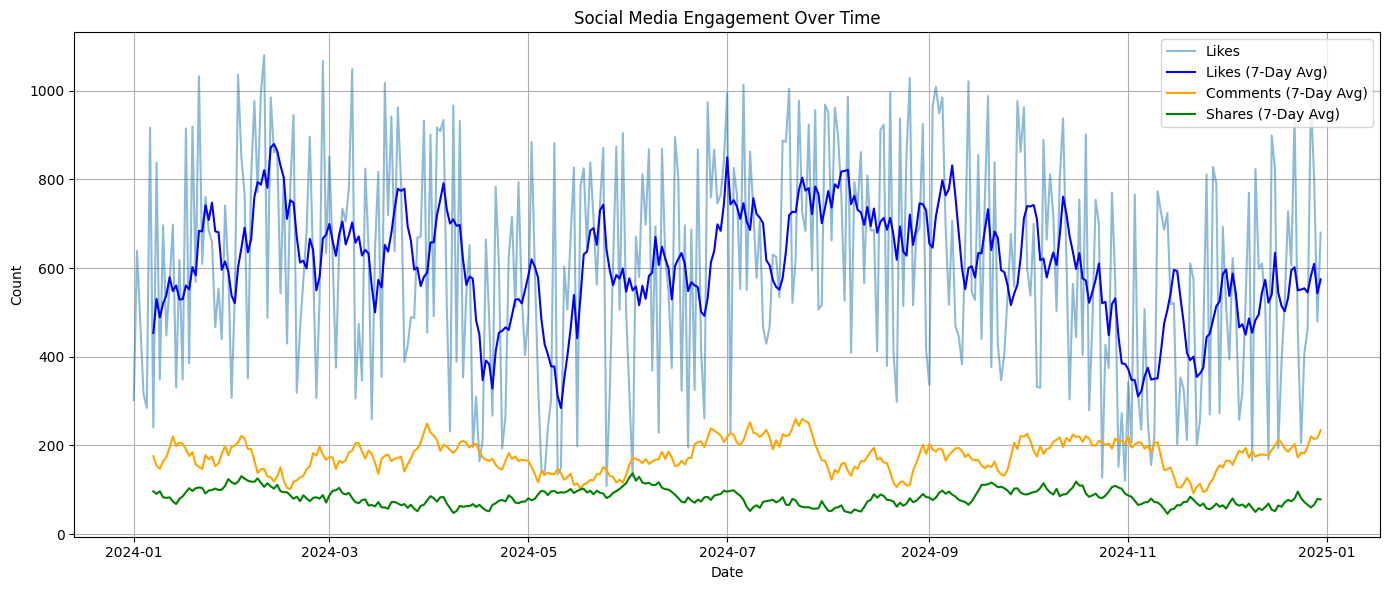

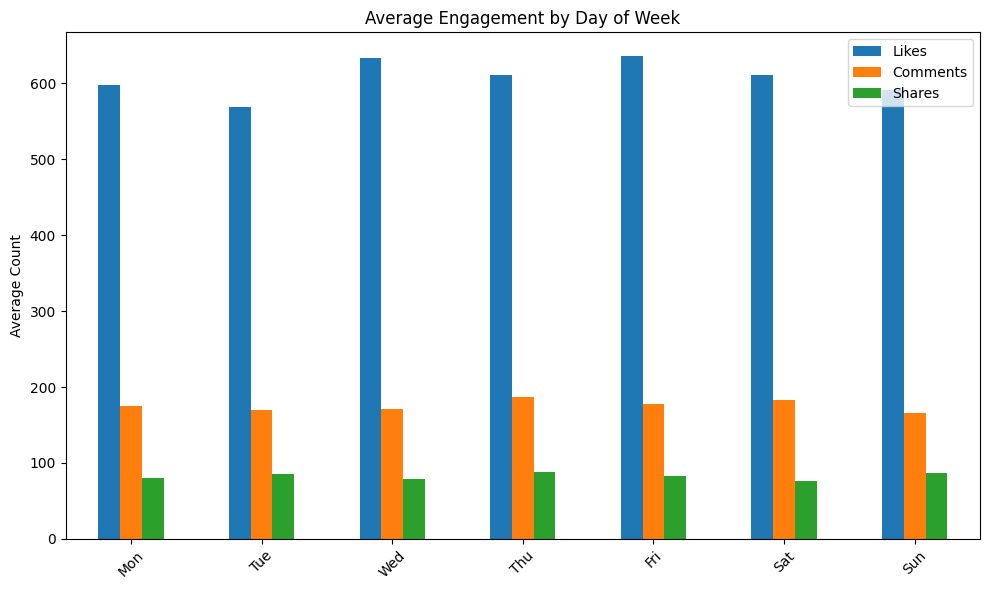

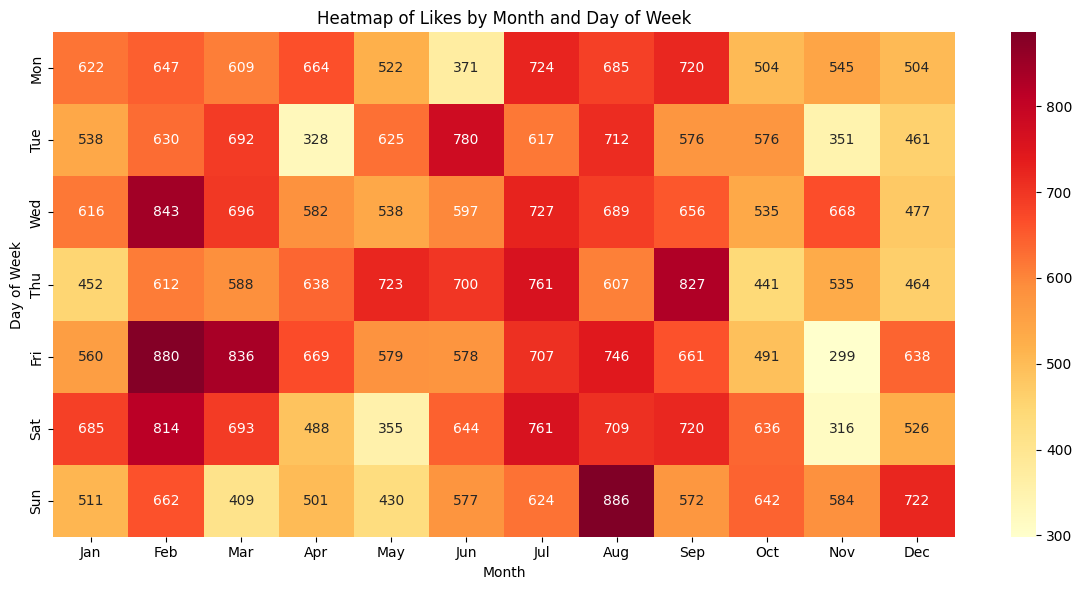

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Simulate 1 year of data
np.random.seed(42)
date_range = pd.date_range(start="2024-01-01", periods=365, freq='D')

# Simulate engagement metrics with patterns
likes = np.random.randint(200, 1000, size=365) + 100 * np.sin(np.linspace(0, 4 * np.pi, 365))
comments = np.random.randint(50, 300, size=365) + 30 * np.cos(np.linspace(0, 8 * np.pi, 365))
shares = np.random.randint(20, 150, size=365) + 20 * np.sin(np.linspace(0, 6 * np.pi, 365))

df_engagement = pd.DataFrame({
    'Date': date_range,
    'Likes': likes,
    'Comments': comments,
    'Shares': shares
})

# Add day of week
df_engagement['DayOfWeek'] = df_engagement['Date'].dt.dayofweek

# Rolling averages
df_engagement['Likes_Rolling'] = df_engagement['Likes'].rolling(window=7).mean()
df_engagement['Comments_Rolling'] = df_engagement['Comments'].rolling(window=7).mean()
df_engagement['Shares_Rolling'] = df_engagement['Shares'].rolling(window=7).mean()

# 📊 Time Series Plot
plt.figure(figsize=(14, 6))
plt.plot(df_engagement['Date'], df_engagement['Likes'], label='Likes', alpha=0.5)
plt.plot(df_engagement['Date'], df_engagement['Likes_Rolling'], label='Likes (7-Day Avg)', color='blue')
plt.plot(df_engagement['Date'], df_engagement['Comments_Rolling'], label='Comments (7-Day Avg)', color='orange')
plt.plot(df_engagement['Date'], df_engagement['Shares_Rolling'], label='Shares (7-Day Avg)', color='green')
plt.title('Social Media Engagement Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 📆 Average Engagement by Day of Week
avg_by_day = df_engagement.groupby('DayOfWeek')[['Likes', 'Comments', 'Shares']].mean()

avg_by_day.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
avg_by_day.plot(kind='bar', figsize=(10, 6))
plt.title('Average Engagement by Day of Week')
plt.ylabel('Average Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 🔥 Heatmap - Day of Week vs. Month
df_engagement['Month'] = df_engagement['Date'].dt.month
heatmap_data = df_engagement.pivot_table(index='DayOfWeek', columns='Month', values='Likes', aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt='.0f',
            xticklabels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                         'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
            yticklabels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.title('Heatmap of Likes by Month and Day of Week')
plt.xlabel('Month')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()
